In [26]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle(for_next=False)

In [27]:
conda list

# packages in environment at /home/home02/pygjc/.conda/envs/jupyter:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
antlr-python-runtime      4.7.2           py37hc8dfbb8_1002    conda-forge
anyio                     3.6.1              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py37h540881e_2    conda-forge
astropy                   4.3.1            py37h09021b7_0  
attrs                     19.3.0                     py_0  
babel                     2.10.3             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0                      py_0  
blas                      1.0                         mkl  
bleach                    3.1.5                      py_0  
bokeh                     2.1.0            py37hc8dfbb8_0    conda-forge
bo

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
import iris
from windspharm.iris import VectorWind
import cartopy.crs as ccrs
import cartopy
hide_toggle(for_next=False)

In [7]:
#use this widget to select paths
import os
path = '/nobackup/pygjc/WACCM_UK_tutorial/'
    
number = 4
counter = 0
hide_toggle(for_next=False)

In [9]:
#use this widget to select files
import os
Files1 = []; Files2 = []; Files3 = []; Files4 = []; Files5 = []; Files6 = []; Files7 = []; Files8 = []; Files9 = []; 

counter = 0
#select directories for files
while (counter < number):
    for x in os.listdir(path):
        Files1.append(x)
    File1 = widgets.Dropdown(options=sorted(Files1),description='File 1:',disabled=False); display(File1); counter = counter+1
    if (counter == number): continue
    
    for x in os.listdir(path):
        Files2.append(x)
    File2 = widgets.Dropdown(options=sorted(Files2),description='File 2:',disabled=False); display(File2); counter = counter+1
    if (counter == number): continue
    
    for x in os.listdir(path):
        Files3.append(x)
    File3 = widgets.Dropdown(options=sorted(Files3),description='File 3:',disabled=False); display(File3); counter = counter+1
    if (counter == number): continue
        
    for x in os.listdir(path):
        Files4.append(x)
    File4 = widgets.Dropdown(options=sorted(Files4),description='File 4:',disabled=False); display(File4); counter = counter+1
    if (counter == number): continue
        
    for x in os.listdir(path):
        Files5.append(x)
    File5 = widgets.Dropdown(options=sorted(Files5),description='File 5:',disabled=False); display(File5); counter = counter+1
    if (counter == number): continue
        
    for x in os.listdir(path):
        Files6.append(x)
    File6 = widgets.Dropdown(options=sorted(Files6),description='File 6:',disabled=False); display(File6); counter = counter+1
    if (counter == number): continue
        
    for x in os.listdir(path):
        Files7.append(x)
    File7 = widgets.Dropdown(options=sorted(Files7),description='File 7:',disabled=False); display(File7); counter = counter+1
    if (counter == number): continue
        
    for x in os.listdir(path):
        Files8.append(x)
    File8 = widgets.Dropdown(options=sorted(Files8),description='File 8:',disabled=False); display(File8); counter = counter+1
    if (counter == number): continue
        
    for x in os.listdir(path):
        Files9.append(x)
    File9 = widgets.Dropdown(options=sorted(Files9),description='File 9:',disabled=False); display(File9); counter = counter+1
    if (counter == number): continue
        

Dropdown(description='File 1:', options=('One_percent_O2.nc', 'Pre_industrial.nc', 'Tidally_locked.nc'), value…

Dropdown(description='File 2:', options=('One_percent_O2.nc', 'Pre_industrial.nc', 'Tidally_locked.nc'), value…

Dropdown(description='File 3:', options=('One_percent_O2.nc', 'Pre_industrial.nc', 'Tidally_locked.nc'), value…

Dropdown(description='File 4:', options=('One_percent_O2.nc', 'Pre_industrial.nc', 'Tidally_locked.nc'), value…

In [10]:
# read in files
"""
make sure this files has gw in order to produce latitudinal weights
"""
ds_h0 = xr.open_dataset('/nobackup/pygjc/GW_File.nc') #open dataset

#assign gaussian weights
gw = ds_h0.gw.values # define guassian weights

"""
Dataset 1
"""
ds1 = xr.open_dataset(path + File1.value) #open dataset
ds1_name = 'Dataset 1'; ds1_g = 9.81

"""
Dataset 2
"""
if (number >= 2):
    ds2 = xr.open_dataset(path + File2.value) #open dataset
    ds2_name = 'Dataset 2'; ds2_g = 9.81

"""
Dataset 3
"""
if (number >= 3):
    ds3 = xr.open_dataset(path + File3.value) #open dataset
    ds3_name = 'Dataset 3'; ds3_g = 9.81
    
"""
Dataset 4
"""
if (number >= 4):
    ds4 = xr.open_dataset(path + File4.value) #open dataset
    ds4_name = 'Dataset 4'; ds4_g = 9.81
    
"""
Dataset 5
"""
if (number >= 5):
    ds5 = xr.open_dataset(path + File5.value) #open dataset
    ds5_name = 'Dataset 5'; ds5_g = 9.81
    
"""
Dataset 6
"""
if (number >= 6):
    ds6 = xr.open_dataset(path + File6.value) #open dataset
    ds6_name = 'Dataset 6'; ds6_g = 9.81
    
"""
Dataset 7
"""
if (number >= 7):
    ds7 = xr.open_dataset(path + File7.value) #open dataset
    ds7_name = 'Dataset 7'; ds7_g = 9.81
    
"""
Dataset 8
"""
if (number >= 8):
    ds8 = xr.open_dataset(path + File8.value) #open dataset
    ds8_name = 'Dataset 8'; ds8_g = 9.81
    
"""
Dataset 9
"""
if (number >= 9):
    ds9 = xr.open_dataset(path + File9.value) #open dataset
    ds9_name = 'Dataset 9'; ds9_g = 9.81
    
hide_toggle(for_next=False)

In [11]:
import matplotlib.cm as cm

#use gradients from colourmaps

#Blues
blues = cm.get_cmap('Blues')
darkblue = blues(0.8)
blue = blues(0.6)
lightblue = blues(0.4)

#Greens
greens = cm.get_cmap('Greens')
darkgreen = greens(0.8)
green = greens(0.6)
lightgreen = greens(0.4)

#Reds
reds = cm.get_cmap('Reds')
darkred = reds(0.8)
red = reds(0.6)
lightred = reds(0.4)

#Purples
purples = cm.get_cmap('Purples')
darkpurple = purples(0.8)
purple = purples(0.6)
lightpurple = purples(0.4)

# now assign colours 
color1 = 'k'; color2 = 'r'; color3 = 'b'; color4 = 'g'; color5 = lightred
color6 = green; color7 = lightgreen; color8 = darkpurple; color9 = lightpurple

hide_toggle(for_next=False)

In [12]:
# return subscript number or text as a string
def sub(Input):
    return r'$_{'+str(Input)+'}$'

# return superscript number or text as a string
def sup(Input):
    return r'$^{'+str(Input)+'}$'

# compute latitudinally weighted dataset from any 3D variable 
def LWAV(DS, time = False):
    try:
        DS = DS.mean(dim='lon')
    except:
        print('')
    if (time == False):
        try:
            DS = DS.mean(dim='time')
        except:
            print('')
    try:
        DS = gw*DS #multiply by gaussian weights
    except:
        DS = gw*DS.reshape(96,70) #multiply by gaussian weights
    try:
        DS = np.sum(DS,axis=1)/gw.sum() #weighted mean
    except:
        DS = np.sum(DS,axis=0)/gw.sum() #weighted mean 
    return DS #return a numpy array that has been modified above

hide_toggle(for_next=False)

In [13]:


"""
Function to return field label for x and y axes or colourbar plot with ease
Chemical mixing ratios are handled in the first line of the function,
then special cases afterwards
If something isn't in here, then you can add it at the bottom
"""
def field_labels(field):
    label = ''
    if (field != 'T'): label = field+' mixing ratio'
    if (field == 'O3'): label = 'O'+sub(3)+' mixing ratio'
    if (field == 'H2O'): label = 'H'+sub(2)+'O mixing ratio'
    if (field == 'T'): label = 'Temperature [K]'
    if (field == 'TS'): label = 'Surface temperature [K]'      
    if (field == 'U'): label ='Zonal wind speed [ms'+sup(-1)+']'
    if (field == 'V'): label = 'Meridional wind speed [ms'+sup(-1)+']' 
    if (field == 'OMEGA'): label ='Vertical wind speed [Pa s'+sup(-1)+']'
    if (field == 'jo2_a'): label ='O'+sub(2)+' (a) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'jo2_b'): label ='O'+sub(2)+' (b) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'jo3_a'): label ='O'+sub(3)+' (a) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'jo3_b'): label ='O'+sub(3)+' (b) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'h2o_a'): label ='H'+sub(2)+'O (a) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'h2o_b'): label ='H'+sub(2)+'O (b) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'h2o_c'): label ='H'+sub(2)+'O (c) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'ch4_a'): label ='CH'+sub(4)+' (a) photolysis rate constant [s'+sup(-1)+']'
    if (field == 'FDL'): label = 'Longwave downward flux [Wm'+r'$^{-2}$'+']'
    if (field == 'FDLC'): label = 'Longwave downward flux (clear-sky) [Wm'+r'$^{-2}$'+']'   
    if (field == 'FDS'): label = 'Shortwave downward flux [Wm'+r'$^{-2}$'+']'
    if (field == 'FDSC'): label = 'Shortwave downward flux (clear-sky) [Wm'+r'$^{-2}$'+']'
    if (field == 'FSDS'): label = 'Downwelling solar flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FSDSC'): label = 'Clearsky downwelling solar flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FSNS'): label = 'Net solar flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FSNSC'): label = 'Clearsky net solar flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FSNT'): label = 'Net solar flux at top of model [Wm'+r'$^{-2}$'+']'
    if (field == 'FSNTC'): label = 'Clearsky net solar flux at top of model [Wm'+r'$^{-2}$'+']'
    if (field == 'FSNTOA'): label = 'Net solar flux at top of atmosphere [Wm'+r'$^{-2}$'+']'
    if (field == 'FSNTOAC'): label = 'Clearsky net solar flux at top of atmosphere [Wm'+r'$^{-2}$'+']'
    if (field == 'FSUTOA'): label = 'Upwelling solar flux at top of atmosphere [Wm'+r'$^{-2}$'+']'  
    if (field == 'FLDS'): label = 'Downwelling longwave flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FLNS'): label = 'Net longwave flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FLNSC'): label = 'Clearsky net longwave flux at surface [Wm'+r'$^{-2}$'+']'
    if (field == 'FLNT'): label = 'Net longwave flux at top of model [Wm'+r'$^{-2}$'+']'
    if (field == 'FLNTC'): label = 'Clearsky net longwave flux at top of model [Wm'+r'$^{-2}$'+']'
    if (field == 'FLUT'): label = 'Upwelling longwave flux at top of model [Wm'+r'$^{-2}$'+']'
    if (field == 'FLUTC'): label = 'Clearsky upwelling longwave flux at top of model [Wm'+r'$^{-2}$'+']'
    if (field == 'IWC'): label = 'Ice water content mixing ratio'
    if (field == 'PRECL'): label = 'Large-scale (stable) precipitation rate\n(liquid + ice) [ms'+sup(-1)+']'
    if (field == 'PRECC'): label = 'Convective precipitation rate\n(liquid + ice) [ms'+sup(-1)+']'
    if (field == 'CLDLIQ'): label = 'Cloud fraction (liquid)'
    if (field == 'CLDICE'): label = 'Cloud fraction (ice)'
    if (field == 'CLDLOW'): label = 'Low cloud fraction'
    if (field == 'CLDMED'): label = 'Medium cloud fraction'
    if (field == 'CLDHGH'): label = 'High cloud fraction'
    if (field == 'CLDTOT'): label = 'Total cloud fraction (vertically integrated)'
    if (field == 'CLOUD'): label = 'Total cloud fraction'
    if (field == 'TROP_Z'): label = 'Tropopause height [m]'
    if (field == 'TROP_P'): label = 'Tropopause pressure [Pa]'
    if (field == 'TROP_T'): label = 'Tropopause temperature [K]'
    if (field == 'QRL'): label = 'Longwave heating rate (clearsky) [Ks'+sup(-1)+']'
    if (field == 'QRL_TOT'): label = 'Total longwave heating rate (clearsky) [Ks'+sup(-1)+']'
    if (field == 'QRS'): label = 'Solar heating rate [Ks'+sup(-1)+']'
    if (field == 'QRS'): label = 'Total solar heating rate [Ks'+sup(-1)+']'
    if (field == 'QRSC'): label = 'Solar heating rate (clearsky) [Ks'+sup(-1)+']'
    if (field == 'QRLC'): label = 'Longwave heating rate (clearsky) [Ks'+sup(-1)+']'
    if (field == 'SZA'): label = 'Solar zenith angle ['+sup('\circ')+']'
    if (field == 'Z3'): label = 'Geopotential height\nabove sea level [m]'
    if (field == 'UTGWSPEC'): label = 'C&M U tendency\ngravity wave spectrum [ms'+sup(-2)+']'
    if (field == 'VTGWSPEC'): label = 'C&M V tendency\ngravity wave spectrum [ms'+sup(-2)+']'
    if (field == 'TTGWSPEC'): label = 'C&M T tendency\ngravity wave spectrum [Ks'+sup(-1)+']'
    if (field == 'BUTGWSPEC'): label = 'Beres U tendency\ngravity wave spectrum [ms'+sup(-2)+']'
    if (field == 'BVGWSPEC'): label = 'Beres V tendency\ngravity wave spectrum [ms'+sup(-2)+']'
    if (field == 'BTGWSPEC'): label = 'Beres T tendency\ngravity wave spectrum [Ks'+sup(-1)+']'
    if (field == 'UTGWORO'): label = 'U tendency orographic\ngravity wave drag [ms'+sup(-2)+']'
    if (field == 'VTGWORO'): label = 'V tendency orographic\ngravity wave drag [ms'+sup(-2)+']'
    if (field == 'TTGWORO'): label = 'Orographic gravity\nwave drag [Ks'+sup(-1)+']'
    if (field == 'OMEGA'): label = 'Vertical velocity (pressure )[Pa s'+sup(-1)+']'
    if (field == 'OMEGAT'): label = 'Vertical heat flux [K Pa s'+sup(-1)+']'
    if (field == 'WSUB'): label = 'Diagnostic sub-grid vertical velocity [ms'+sup(-1)+']'
    if (field == 'AQRAIN'): label = 'Average rain mixing ratio'
    if (field == 'AQSNOW'): label = 'Average snow mixing ratio'
    if (field == 'ICEFRAC'): label = 'Sea ice fraction'
    return label
    """
    add extra fields:
    if (field == ''): label = ''
    """
    
hide_toggle(for_next=False)
    

In [14]:
#cmap list
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
         'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
         'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
         'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
         'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
         'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
         'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
         'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r',
         'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
         'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
         'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
cmaps = sorted(cmaps)
hide_toggle(for_next=False)

In [15]:
def Store_values(var1 = True, var2 = False, var3 = False, var4 = False, var5 = False, 
           var6 = False, var7 = False, var8 = False, var9 = False, plot_num = 1):
    Values = np.array([var1.max(), var1.min()])
    if (plot_num == 2):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min()])
    if (plot_num == 3):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min()])
    if (plot_num == 4):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min(),
                           var4.max(), var4.min()])
    if (plot_num == 5):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min(),
                           var4.max(), var4.min(), var5.max(), var5.min()])
    if (plot_num == 6):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min(),
                           var4.max(), var4.min(), var5.max(), var5.min(),var6.max(), var6.min()])
    if (plot_num == 7):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min(),
                           var4.max(), var4.min(), var5.max(), var5.min(),var6.max(), var6.min(),
                           var7.max(), var7.min()])
    if (plot_num == 8):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min(),
                           var4.max(), var4.min(), var5.max(), var5.min(),var6.max(), var6.min(),
                           var7.max(), var7.min(), var8.max(), var8.min()])
    if (plot_num == 9):
        Values = np.array([var1.max(), var1.min(), var2.max(), var2.min(), var3.max(), var3.min(),
                           var4.max(), var4.min(), var5.max(), var5.min(),var6.max(), var6.min(),
                           var7.max(), var7.min(), var8.max(), var8.min(), var9.max(), var9.min()])
        
    if (Values.min() < 0 and Values.max() > 0 and abs(Values.max()) > abs(Values.min())):
        Values = np.append(Values, -Values.max())
    if (Values.min() < 0 and Values.max() > 0 and abs(Values.max()) < abs(Values.min())):
        Values = np.append(Values, -Values.min())
    return Values

hide_toggle(for_next=False)    

In [16]:
def SpecificLatWeight(DS,name,pos):
    if (name == None):
        try:
            DS = DS.mean(dim='lon')
        except:
            print('No longitude data for this dataset')
        try:
            DS = DS.mean(dim='time')
        except:
            print('No time series for this dataset')
        DS = DS[:70,47-pos:48+pos]*gw[47-pos:48+pos] #multiply by gaussian weights
        DS = np.sum(DS,axis=1)/gw[47-pos:48+pos].sum() #weighted mean
    else:
        try:
            DS = DS[name].mean(dim='lon')
        except:
            DS = DS[name]
            print('No longitude data for this dataset')
        try:
            DS = DS.mean(dim='time')
        except:
            print('No time series for this dataset')
        DS = DS[:70,47-pos:48+pos]*gw[47-pos:48+pos] #multiply by gaussian weights
        DS = np.sum(DS,axis=1)/gw[47-pos:48+pos].sum() #weighted mean
        
    return DS #return a numpy array that has been modified above
hide_toggle(for_next=False)

In [17]:
def compute_col(ds, field = 'O3', time = False, lon = True, g = 9.80616, m_var = False):
    
    P = ds1.lev.values
    h = 6.626*10**-34 # Planck's constant
    k = 1.381*10**-23 # boltzmann constant
    P_0 = 1e5 #surface pressure
    DU = (2.687*10**20) #1 Dobson Unit
    G = 6.67e-11 #Gravitational constant
    M_Earth = 5.972e24
    R_Earth = 6371e3
    
    #kboltz = 1.380044E-16   # boltzman's constant (erg/K)
    #R = 2.8704e6            # gas constant (erg/g/K)
    g = g             # grav acceleration (cm/sec2)
    #pa2dyn = 10.            # Pascals to dyn/cm2
    cm2todu = 1./2.6867e20  # convert colunm density / cm^2 to Dobson units
    m_avg = 28.96*1.661e-27
    
    #plev = ds['lev']
    
    #calcualte column integrals 
    variable = ds[field]#.values
    
    # variables to calcualate hybrid pressure on model interfaces
    ps = ds['PS'].values # surface pressure
    p0 = ds['P0'].values
    hyai = ds['hyai'].values
    hybi = ds['hybi'].values
    
    #col = np.ndarray(ps.shape, np.float32)
    dp = np.ndarray(variable.shape, np.float32)
    
    nt = ds['time'].size
    ny = ds['lat'].size
    nz = ds['lev'].size
    nx = ds['lon'].size
    
    #z = H*np.log(P/P[0])
    
    #g = g *(R_Earth**2)/(R_Earth+z)**2
    
    press = np.ndarray(nz, np.float32)
    for i in range(nt):
        for j in range(ny):
            for k in range(nx):
                press = hyai * p0 + hybi * ps[i,j,k]
                for iz in range(nz):
                    dp[i,iz,j,k] = (press[iz+1]-press[iz])
                    
    #calcualte column integrals 
    variable = ds[field]#.values
        
    variable = variable * dp / m_avg
    
    for i in range(nt):
        for j in range(96):
            for k in range(144):
                variable[i,:,j,k] = variable[i,:,j,k]/g
    
    if (field == 'O3'):
        var_col = np.sum(variable, axis = 1) * cm2todu
    else:
        var_col = np.sum(variable, axis = 1)
    if (lon == False):
        var_col  = var_col.mean(dim='lon')
    if (time == False):
        var_col  = var_col.mean(dim='time')
    print('Columns calculated')
    print('Returns number of molecules per metre squared in a column, or the number of Dobson units if O3 selected, or the mass in kg if m_var is not false but is a number (e.g. 18 for H2O)')
    if (m_var != False and field != 'O3'): var_col = var_col * m_var * 1.667e-27
    return var_col

hide_toggle(for_next=False)

In [18]:
import matplotlib.colors as colors

#Zonal mean plots: function definitions
def Zonal_Mean_Plot(plot_num = 1, logtop=-4, field = 'T', cmap = 'Blues',
                    fig_width = 7, fig_height = 4, Contours = False, Levels = 5, logc = False, save = False):
    
    #format for contours
    fmt = '%r '
    if(field == 'T'):
        fmt = '%r K' 
    if(field == 'U' or field == 'V'):
        fmt = '%r ms'+sup(-1) 
    
    #get figure size
    Figure = plt.figure(figsize=(fig_width, fig_height))
    gs = gridspec.GridSpec(1, 1) #1 column
    
    var1 = ds1[field]; var2 = ''; var3 = ''; var4 = ''; var5 = ''; var6 = ''; var7 = ''; var8 = ''; var9 = ''
    if (plot_num >= 2): var2 = ds2[field]
    if (plot_num >= 3): var3 = ds3[field]
    if (plot_num >= 4): var4 = ds4[field]
    if (plot_num >= 5): var5 = ds5[field]
    if (plot_num >= 6): var6 = ds6[field]
    if (plot_num >= 7): var7 = ds7[field]
    if (plot_num >= 8): var8 = ds8[field]
    if (plot_num >= 9): var9 = ds9[field]
    
    if (var1.dims == ('time','lev', 'lat', 'lon')):
        #asign variable from datasets    
        
        level = abs(ds1.coords["lev"] - 10**logtop).argmin()
        
        var1 = var1.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 2): var2 = var2.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 3): var3 = var3.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 4): var4 = var4.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 5): var5 = var5.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 6): var6 = var6.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 7): var7 = var7.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 8): var8 = var8.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
        if (plot_num >= 9): var9 = var9.mean(dim = 'time').isel(lev = np.arange(level,70,1)).mean(dim = 'lon')
    
        Values = Store_values(var1 = var1, var2 = var2, var3 = var3, var4 = var4, var5 = var5, 
           var6 = var6, var7 = var7, var8 = var8, var9 = var9, plot_num = plot_num)
    
        #sort out subplots
        if (plot_num == 2):
            gs = gridspec.GridSpec(1, 2) #2 columns
        if (plot_num == 3):
            gs = gridspec.GridSpec(1, 3) #3 columns
        if (plot_num == 4 or plot_num == 5 or plot_num == 6):
            gs = gridspec.GridSpec(2, 3) #2 rows 3 columns
            gs.update(hspace = 0.3)
        if (plot_num == 7 or plot_num == 8 or plot_num == 9):
            gs = gridspec.GridSpec(3, 3) #3 rows 3 columns
            gs.update(hspace = 0.3)

        plt.subplot(gs[0, 0])
        a = var1
        if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
        else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
        ax = plt.gca()
        ax.set_ylim([1000,10**logtop])
        ax.set_yscale('log')
        ax.set_ylabel('Pressure (hPa)', fontsize = 15)
        plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
        plt.title(ds1_name, fontsize = 15)
        plt.tick_params(labelsize = 15, length = 4, right = True, width = 2)
        if (Contours == True): #set up contours
            x = a.lat.values; y = a.lev.values; z = a.values
            CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
            plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours            

        if (plot_num >= 2):
            plt.subplot(gs[0, 1])
            a = var2
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds2_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 3):
            plt.subplot(gs[0, 2])
            a = var3
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds3_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 4):
            plt.subplot(gs[1, 0])
            a = var4
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            ax.set_ylabel('Pressure (hPa)', fontsize = 15)
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds4_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 5):
            plt.subplot(gs[1, 1])
            a = var5
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds5_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 6):
            plt.subplot(gs[1, 2])
            a = var6
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds6_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 7):
            plt.subplot(gs[2, 0])
            a = var7
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.ylabel('Pressure [hPa]', fontsize = 15)
            plt.title(ds7_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 8):
            plt.subplot(gs[2, 1])
            a = var8
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds8_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        if (plot_num >= 9):
            plt.subplot(gs[2, 2])
            a = var9
            if (logc != True): model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmin = Values.min(), vmax = Values.max())
            else: model = a.where(ds1.coords["lev"] > 10**logtop).plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            plt.xlabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.title(ds9_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = a.lat.values; y = a.lev.values; z = a.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=10)#label the contours
        #add colourbar   
        cax = Figure.add_axes([0.94,0.125,0.02,0.755])
        cbar = plt.colorbar(model, cax=cax)
        cbar.set_label(field_labels(field = field),size=15)
        cbar.ax.tick_params(labelsize=15) 
        if (save == True):
            plt.savefig('test.png', bbox_inches='tight')
    else:
        plt.scatter((0,360),(-90,90))
        plt.text(180, 0, 'select a 2-D or 3-D field', horizontalalignment='center')
        plt.show()
    return

hide_toggle(for_next=False)

In [19]:
#2D field plot
def Two_D_Plot(plot_num = 1, field = 'T', cmap = 'Blues', fig_width = 7, fig_height = 4,
               Cmap_Levels = False, Contours = False, Levels = 5, logc = False, save = False):
    #format for contours
    fmt = '%r '
    if(field == 'T'):
        fmt = '%r K' 
    if(field == 'U' or field == 'V'):
        fmt = '%r ms'+sup(-1) 
    
    #get figure size
    Figure = plt.figure(figsize=(fig_width, fig_height))
    gs = gridspec.GridSpec(1, 1) #1 column
    
    var1 = ds1[field]; var2 = ''; var3 = ''; var4 = ''; var5 = ''; var6 = ''; var7 = ''; var8 = ''; var9 = ''
    if (plot_num >= 2): var2 = ds2[field]
    if (plot_num >= 3): var3 = ds3[field]
    if (plot_num >= 4): var4 = ds4[field]
    if (plot_num >= 5): var5 = ds5[field]
    if (plot_num >= 6): var6 = ds6[field]
    if (plot_num >= 7): var7 = ds7[field]
    if (plot_num >= 8): var8 = ds8[field]
    if (plot_num >= 9): var9 = ds9[field]
    
    Values = Store_values(var1 = var1, var2 = var2, var3 = var3, var4 = var4, var5 = var5,
                    var6 = var6, var7 = var7, var8 = var8, var9 = var9, plot_num = plot_num)
    
    if (logc == True and Values.min() <= 0): Values[np.abs(Values) <= 0] = 1e-12 # some zeros
    
    if ((var1.dims == ('time','lat', 'lon') and len(var1.time.values == 1)) or var1.dims == ('lat', 'lon')):
        #asign variable from datasets    
        
        var1 = var1.mean(dim = 'time')
        if (plot_num >= 2): var2 = var2.mean(dim = 'time')
        if (plot_num >= 3): var3 = var3.mean(dim = 'time')
        if (plot_num >= 4): var4 = var4.mean(dim = 'time')
        if (plot_num >= 5): var5 = var5.mean(dim = 'time')
        if (plot_num >= 6): var6 = var6.mean(dim = 'time')
        if (plot_num >= 7): var7 = var7.mean(dim = 'time')
        if (plot_num >= 8): var8 = var8.mean(dim = 'time')
        if (plot_num >= 9): var9 = var9.mean(dim = 'time')
            
        #sort out subplots
        if (plot_num == 2):
            gs = gridspec.GridSpec(1, 2) #2 columns
        if (plot_num == 3):
            gs = gridspec.GridSpec(1, 3) #3 columns
        if (plot_num >= 4 and plot_num <= 6):
            gs = gridspec.GridSpec(2, 3) #2 rows 3 columns
            gs.update(hspace = 0.3)
        if (plot_num >= 7 and plot_num <= 9):
            gs = gridspec.GridSpec(3, 3) #2 rows 3 columns
            gs.update(hspace = 0.3)

        plt.subplot(gs[0, 0])
        model = var1.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
        if (logc == True): model = var1.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
        if (Cmap_Levels == True): 
            model = var1.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var1.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
        plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
        plt.ylabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
        plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
        plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
        plt.title(ds1_name, fontsize = 15)
        plt.tick_params(labelsize = 15, length = 4, right = True, width = 2)
        if (Contours == True): #set up contours
            x = var1.lon.values; y = var1.lat.values; z = var1.values
            CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
            plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours            

        if (plot_num >= 2):
            plt.subplot(gs[0, 1])
            model = var2.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var2.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var2.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var2.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds2_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var2.lon.values; y = var2.lat.values; z = var2.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 3):
            plt.subplot(gs[0, 2])
            model = var3.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var3.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var3.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var3.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds3_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var3.lon.values; y = var3.lat.values; z = var3.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 4):
            plt.subplot(gs[1, 0])
            model = var4.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var4.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var4.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var4.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.ylabel('Latitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds4_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var4.lon.values; y = var4.lat.values; z = var4.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 5):
            plt.subplot(gs[1, 1])
            model = var5.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var5.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True):
                model = var5.plot.pcolormesh(cmap = cmap, add_labels=False,levels = Levels, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var5.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds5_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var5.lon.values; y = var5.lat.values; z = var5.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 6):
            plt.subplot(gs[1, 2])
            model = var6.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var6.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var6.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var6.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds6_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var6.lon.values; y = var6.lat.values; z = var6.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 7):
            plt.subplot(gs[2, 0])
            model = var7.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var7.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var7.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var7.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds7_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var7.lon.values; y = var7.lat.values; z = var7.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 8):
            plt.subplot(gs[2, 1])
            model = var8.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var8.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var8.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var8.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds8_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var8.lon.values; y = var8.lat.values; z = var8.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        if (plot_num >= 9):
            plt.subplot(gs[2, 2])
            model = var9.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
            if (logc == True): model = var9.plot.pcolormesh(cmap = cmap, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            if (Cmap_Levels == True): 
                model = var9.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, vmax = Values.max(), vmin = Values.min())
                if (logc == True): model = var9.plot.pcolormesh(cmap = cmap, levels = Levels, add_labels=False, add_colorbar = False, norm=colors.LogNorm(vmin = Values.min(), vmax = Values.max()))
            plt.xlabel('Longitude ['+r'$^\circ$'+']', fontsize = 15)
            plt.xlim(0,360); plt.xticks(np.arange(0, 420, 60))
            plt.ylim(-90,90); plt.yticks(np.arange(-90, 120, 30))
            plt.title(ds9_name, fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, labelleft = False, right = True, width = 2)
            if (Contours == True): #set up contours
                x = var9.lon.values; y = var9.lat.values; z = var9.values
                CS = plt.contour(x,y,z,Levels,linewidths=2,colors='k')#set the contours
                plt.clabel(CS,CS.levels, inline=1, fmt=fmt, fontsize=12)#label the contours
                
        #add colourbar   
        cax = Figure.add_axes([0.94,0.125,0.02,0.755])
        cbar = plt.colorbar(model, cax=cax)
        cbar.set_label(field_labels(field = field),size=15)
        cbar.ax.tick_params(labelsize=15) 
        if (save == True):
            plt.savefig('test.png', bbox_inches='tight')
    else:
        plt.scatter((0,360),(-90,90))
        plt.text(180, 0, 'select a 2-D or 3-D field', horizontalalignment='center')
        plt.show()
    return

hide_toggle(for_next=False)

In [20]:
#Vertical profile plots: function definitions
def Vertical_Profile_Plot(same_plot = [True, False], plot_num = 1, logtop=-4, field = 'T',
                          fig_width = 7, fig_height = 4, xscale = 'log', save = False):
    
    #get figure size
    Figure = plt.figure(figsize=(fig_width, fig_height))
    gs = gridspec.GridSpec(1, 1) #1 column
    
    level = abs(ds1.coords["lev"] - 10**logtop).argmin()
    
    #asign variable from datasets 
    var1 = ds1[field]; var2 = ''; var3 = ''; var4 = ''; var5 = ''; var6 = ''; var7 = ''; var8 = ''; var9 = ''
    if (plot_num >= 2): var2 = ds2[field]
    if (plot_num >= 3): var3 = ds3[field]
    if (plot_num >= 4): var4 = ds4[field]
    if (plot_num >= 5): var5 = ds5[field]
    if (plot_num >= 6): var6 = ds6[field]
    if (plot_num >= 7): var7 = ds7[field]
    if (plot_num >= 8): var8 = ds8[field]
    if (plot_num >= 9): var9 = ds9[field]
    
    if (var1.dims == ('time','lev', 'lat', 'lon')):
        #asign variable from datasets    
        
        var1 = var1.mean(dim = 'time'); v1 = var1.isel(lev = np.arange(level,70,1)); v2 = 0; v3 = 0; v4 = 0; v5 = 0; v6 = 0; v7 = 0; v8 = 0;v9 = 0
        if (plot_num >= 2): var2 = var2.mean(dim = 'time'); v2 = var2.isel(lev = np.arange(level,70,1))
        if (plot_num >= 3): var3 = var3.mean(dim = 'time'); v3 = var3.isel(lev = np.arange(level,70,1))
        if (plot_num >= 4): var4 = var4.mean(dim = 'time'); v4 = var4.isel(lev = np.arange(level,70,1))
        if (plot_num >= 5): var5 = var5.mean(dim = 'time'); v5 = var5.isel(lev = np.arange(level,70,1))
        if (plot_num >= 6): var6 = var6.mean(dim = 'time'); v6 = var6.isel(lev = np.arange(level,70,1))
        if (plot_num >= 7): var7 = var7.mean(dim = 'time'); v7 = var7.isel(lev = np.arange(level,70,1))
        if (plot_num >= 8): var8 = var8.mean(dim = 'time'); v8 = var8.isel(lev = np.arange(level,70,1))
        if (plot_num >= 9): var9 = var9.mean(dim = 'time'); v9 = var9.isel(lev = np.arange(level,70,1))
            
        Values = Store_values(var1 = v1, var2 = v2, var3 = v3,
                              var4 = v4, var5 = v5,  var6 = v6, 
                              var7 = v7, var8 = v8, var9 = v9, 
                              plot_num = plot_num)
        
        if (same_plot == False):

            #sort out subplots
            if (plot_num == 2):
                gs = gridspec.GridSpec(1, 2) #2 columns
            if (plot_num == 3):
                gs = gridspec.GridSpec(1, 3) #3 columns
            if (plot_num == 4):
                gs = gridspec.GridSpec(2, 3) #2 rows 3 columns
                gs.update(hspace = 0.3)
            if (plot_num == 5):
                gs = gridspec.GridSpec(2, 3) #2 rows 3 columns
                gs.update(hspace = 0.3)
            if (plot_num == 6):
                gs = gridspec.GridSpec(2, 3) #2 rows 3 columns
                gs.update(hspace = 0.3)
            if (plot_num >= 7 and plot_num <= 9):
                gs = gridspec.GridSpec(3, 3) #3 rows 3 columns
                gs.update(hspace = 0.3)

            plt.subplot(gs[0, 0])
            plt.plot(LWAV(var1),ds1.lev.values, lw = 2, color = color1)
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            ax.set_xscale('log')
            if (xscale == 'Linear'): ax.set_xscale('linear')
            if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
            ax.set_ylabel('Pressure (hPa)', fontsize = 15)
            ax.set_xlabel(field_labels(field = field), fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, width = 2)
            plt.title(ds1_name, fontsize = 15)
            if (field=='T'):
                ax.set_xlabel('Temperature [K]', fontsize = 15)
                ax.set_xscale('linear')
            plt.xlim(int(Values.min()),int(Values.max()))

            if (plot_num >= 2):
                plt.subplot(gs[0, 1])
                plt.plot(LWAV(var2),ds2.lev.values, lw = 2, color = color2)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds2_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))

            if (plot_num >= 3):                
                plt.subplot(gs[0, 2]) 
                plt.plot(LWAV(var3),ds3.lev.values, lw = 2, color = color3)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds3_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))
            
            if (plot_num >= 4):                
                plt.subplot(gs[1, 0])
                plt.plot(LWAV(var4),ds4.lev.values, lw = 2, color = color4)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                ax.set_ylabel('Pressure (hPa)', fontsize = 15)
                plt.tick_params(labelsize = 15, right = True, length = 4, width = 2)
                plt.title(ds4_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))
            
            if (plot_num >= 5):                
                plt.subplot(gs[1, 1])
                plt.plot(LWAV(var5),ds5.lev.values, lw = 2, color = color5)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds5_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xlabel('Temperature [K]', fontsize = 15)
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))
            
            if (plot_num >= 6):                
                plt.subplot(gs[1, 2])
                plt.plot(LWAV(var6),ds6.lev.values, lw = 2, color = color6)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds6_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xlabel('Temperature [K]', fontsize = 15)
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))
                    
            if (plot_num >= 7):                
                plt.subplot(gs[2, 0])
                plt.plot(LWAV(var7),ds7.lev.values, lw = 2, color = color7)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds7_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xlabel('Temperature [K]', fontsize = 15)
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))
                    
            if (plot_num >= 8):                
                plt.subplot(gs[2, 1])
                plt.plot(LWAV(var8),ds8.lev.values, lw = 2, color = color8)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds8_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xlabel('Temperature [K]', fontsize = 15)
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))
                    
            if (plot_num >= 9):                
                plt.subplot(gs[2, 2])
                plt.plot(LWAV(var9),ds9.lev.values, lw = 2, color = color9)
                ax = plt.gca()
                ax.set_ylim([1000,10**logtop])
                ax.set_yscale('log')
                ax.set_xscale('log')
                if (xscale == 'Linear'): ax.set_xscale('linear')
                if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
                ax.set_xlabel(field_labels(field = field), fontsize = 15)
                plt.tick_params(labelsize = 15, labelleft = False, right = True, length = 4, width = 2)
                plt.title(ds9_name, fontsize = 15)
                if (field=='T'):
                    ax.set_xlabel('Temperature [K]', fontsize = 15)
                    ax.set_xscale('linear')
                plt.xlim(int(Values.min()),int(Values.max()))

        #plot global mean vertical profile of chemical mixing ratio/temperature on same plots
        elif (same_plot == True):
            plt.subplot(gs[0, 0])
            plt.plot(LWAV(var1),ds1.lev.values, color = color1, lw = 2, label = ds1_name)
            if (plot_num >= 2):
                plt.plot(LWAV(var2),ds2.lev.values, color = color2, lw = 2, label = ds2_name)
            if (plot_num >= 3):
                plt.plot(LWAV(var3),ds3.lev.values, color = color3, lw = 2, label = ds3_name)
            if (plot_num >= 4):
                plt.plot(LWAV(var4),ds4.lev.values, color = color4, lw = 2, label = ds4_name)
            if (plot_num >= 5):
                plt.plot(LWAV(var5),ds5.lev.values, color = color5, lw = 2, label = ds5_name)
            if (plot_num >= 6):
                plt.plot(LWAV(var6),ds6.lev.values, color = color6, lw = 2, label = ds6_name)
            if (plot_num >= 7):
                plt.plot(LWAV(var7),ds7.lev.values, color = color7, lw = 2, label = ds7_name)
            if (plot_num >= 8):
                plt.plot(LWAV(var8),ds8.lev.values, color = color8, lw = 2, label = ds8_name)
            if (plot_num >= 9):
                plt.plot(LWAV(var9),ds9.lev.values, color = color9, lw = 2, label = ds9_name)
            ax = plt.gca()
            ax.set_ylim([1000,10**logtop])
            ax.set_yscale('log')
            ax.set_xscale('log')
            if (xscale == 'Linear'): ax.set_xscale('linear')
            if (xscale == 'Symmetric log'): ax.set_xscale('symlog')
            ax.set_ylabel('Pressure (hPa)', fontsize = 15)
            ax.set_xlabel(field_labels(field = field), fontsize = 15)
            plt.tick_params(labelsize = 15, length = 4, width = 2)
            plt.legend(loc = 0, frameon = False, fontsize = 15)
            if (field=='T'):
                ax.set_xlabel('Temperature [K]', fontsize = 15)
                ax.set_xscale('linear')
        if (save == True):
            plt.savefig('test.png', bbox_inches='tight')
        plt.xlim(int(Values.min()),int(Values.max()))
    else:
        plt.scatter((0,360),(-90,90))
        plt.text(180, 0, 'select a 2-D or 3-D field', horizontalalignment='center')
        plt.show()
    return  

hide_toggle(for_next=False)

In [21]:
def Streamline_Plot(plot_num = 1, field = 'OMEGA', cmap = 'seismic', avg = False, 
                    level = 69, average = 'Tropospheric', quiver = False, fig_width = 5, fig_height = 10,
                    streamline = True, colourbar_streamline = False, 
                    Projection = 'Robinson', lon = 0, lat = 0, coast = False):

    #sort out subplots
    rows = 1; cols = 1
    if (plot_num == 2):
        rows = 2; cols = 1
    if (plot_num == 3):
        rows = 3; cols = 1
    if (plot_num >= 4 and plot_num <= 6):
        rows = 3; cols = 2
    if (plot_num >= 7 and plot_num <= 9):
        rows = 3; cols = 3
        
    level1 = 48
    level2 = 69
    level = level
    average = average
    if (average == 'Lower tropospheric'):
        level1 = 63
        level2 = 69
    if (average == 'Middle tropospheric'):
        level1 = 53
        level2 = 63
    if (average == 'Upper tropospheric'):
        level1 = 48
        level2 = 53
    if (average == 'Stratospheric'):
        level1 = 26
        level2 = 48
    if (average == 'Mesospheric'):
        level1 = 11
        level2 = 26
        
    quiver = quiver
    streamline = streamline
    colourbar_streamline = colourbar_streamline
    colorbar = False    
    coast = coast # draw coastlines
    
    if (field == 'CLDHGH' or field == 'CLDMED' or field == 'ICEFRAC' or field == 'TS'):
        var1 = ds1[field][0,:,:]; var2 = var1*1; var3 = var1*1
        var4 = var1*1; var5 = var1*1; var6 = var1*1; var7 = var1*1; var8 = var1*1; var9 = var1*1
        if (plot_num >= 2): var2 = ds2[field][0,:,:]
        if (plot_num >= 3): var3 = ds3[field][0,:,:]
        if (plot_num >= 4): var4 = ds4[field][0,:,:]
        if (plot_num >= 5): var5 = ds5[field][0,:,:]
        if (plot_num >= 6): var6 = ds6[field][0,:,:]
        if (plot_num >= 7): var7 = ds7[field][0,:,:]
        if (plot_num >= 8): var8 = ds8[field][0,:,:]
        if (plot_num >= 9): var9 = ds9[field][0,:,:]
    else:

        var1 = ds1[field][0,level1:level2,:,:].mean(dim = 'lev'); var2 = var1*1; var3 = var1*1
        var4 = var1*1; var5 = var1*1; var6 = var1*1; var7 = var1*1; var8 = var1*1; var9 = var1*1
        if (plot_num >= 2): var2 = ds2[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 3): var3 = ds3[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 4): var4 = ds4[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 5): var5 = ds5[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 6): var6 = ds6[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 7): var7 = ds7[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 8): var8 = ds8[field][0,level1:level2,:,:].mean(dim = 'lev')
        if (plot_num >= 9): var9 = ds9[field][0,level1:level2,:,:].mean(dim = 'lev')

        if (avg == False):
            var1 = ds1[field][0,level,:,:]; var2 = var1*1; var3 = var1*1
            var4 = var1*1; var5 = var1*1; var6 = var1*1; var7 = var1*1; var8 = var1*1; var9 = var1*1
            if (plot_num >= 2): var2 = ds2[field][0,level,:,:]
            if (plot_num >= 3): var3 = ds3[field][0,level,:,:]
            if (plot_num >= 4): var4 = ds4[field][0,level,:,:]
            if (plot_num >= 5): var5 = ds5[field][0,level,:,:]
            if (plot_num >= 6): var6 = ds6[field][0,level,:,:]
            if (plot_num >= 7): var7 = ds7[field][0,level,:,:]
            if (plot_num >= 8): var8 = ds8[field][0,level,:,:]
            if (plot_num >= 9): var9 = ds9[field][0,level,:,:]

    Values = Store_values(var1 = var1, var2 = var2, var3 = var3, var4 = var4, var5 = var5, 
                                  var6 = var6, var7 = var7, var8 = var8, var9 = var9, plot_num = plot_num)
    
    Figure = plt.figure(figsize = (fig_width, fig_height))
    
    #plot 1
    ax = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Robinson(central_longitude=lon))  
    if (Projection == 'Orthographic'): ax = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
    if (Projection == 'Mollweide'): ax = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Mollweide(central_longitude=lon))
    if (Projection == 'Mercator'): ax = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Mercator(central_longitude=lon))
    if (Projection == 'EckertIV'): ax = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.EckertIV(central_longitude=lon))          

    model = var1.plot(levels = 11, cmap = cmap, add_labels = False, add_colorbar = False,
                                                          vmin = Values.min(), vmax = Values.max(), transform=ccrs.PlateCarree())
    if (coast == True):
        ax.coastlines('110m')
    X = ds1.lon.values
    Y = ds1.lat.values
    U = ds1.U[level1:level2,:,:].mean(dim = 'lev').values
    V = ds1.V[level1:level2,:,:].mean(dim = 'lev').values
    if (avg == False):
        U = ds1.U[0,level,:,:].values
        V = ds1.V[0,level,:,:].values
    magnitude = (U ** 2 + V ** 2) ** 0.5
    vector_crs = crs=ccrs.PlateCarree()
    if (streamline == True):
        model1 = ax.streamplot(X, Y, U, V, color='k', transform=vector_crs, linewidth = 3,arrowsize = 2.5, density = 0.6, cmap='Greys')
    if (quiver == True):
        ax.quiver(X[0:144:8], Y[0:96:8], U[0:96:8,0:144:8], V[0:96:8,0:144:8], color='k', transform=vector_crs)#, minshaft = 2, width
    plt.title(ds1_name, fontsize = '15')
    if (colourbar_streamline == True):
        cax = Figure.add_axes([0.94,0.55,0.04,0.330])
        cbar = plt.colorbar(model1.lines, cax=cax)
        cbar.set_label('Wind magnitude [ms'+sup(-1)+']', size=15)
        cbar.ax.tick_params(labelsize=15) 
        
    if (plot_num >=2):
        #plot 2
        ax = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Robinson(central_longitude=lon))
        if (Projection == 'Orthographic'): ax = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
        if (Projection == 'Mollweide'): ax = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Mollweide(central_longitude=lon))
        if (Projection == 'Mercator'): ax = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Mercator(central_longitude=lon))
        if (Projection == 'EckertIV'): ax = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.EckertIV(central_longitude=lon))          
        model = var2.plot(levels = 11, cmap = cmap, add_labels = False, add_colorbar = False,
                                                              vmin = Values.min(), vmax = Values.max(), transform=ccrs.PlateCarree())
        if (coast == True):
            ax.coastlines('110m')
        X = ds2.lon.values
        Y = ds2.lat.values
        U = ds2.U[0,level1:level2,:,:].mean(dim = 'lev').values
        V = ds2.V[0,level1:level2,:,:].mean(dim = 'lev').values
        if (avg == False):
            U = ds2.U[0,level,:,:].values
            V = ds2.V[0,level,:,:].values 
        magnitude = (U ** 2 + V ** 2) ** 0.5
        vector_crs = crs=ccrs.PlateCarree()
        if (streamline == True):
            model2 = ax.streamplot(X, Y, U, V, color='k', transform=vector_crs, 
                                   linewidth = 3,arrowsize = 2.5, density = 0.6, cmap='Greys')
        if (quiver == True):
            ax.quiver(X[0:144:8], Y[0:96:8], U[0:96:8,0:144:8], V[0:96:8,0:144:8], color='k', transform=vector_crs)#, minshaft = 2, width =0.004, headwidth = 9)
        plt.title(ds2_name, fontsize = '15')
        if (colourbar_streamline == True):
            cax = Figure.add_axes([0.94,0.130,0.04,0.330])
            cbar = plt.colorbar(model2.lines, cax=cax)
            cbar.set_label('Horizontal wind magnitude [ms'+sup(-1)+']', size=15)
            cbar.ax.tick_params(labelsize=15) 
        
    if (plot_num >=3):
        #plot 3
        ax = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Robinson(central_longitude=lon))
        if (Projection == 'Orthographic'): ax = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
        if (Projection == 'Mollweide'): ax = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Mollweide(central_longitude=lon))
        if (Projection == 'Mercator'): ax = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Mercator(central_longitude=lon))
        if (Projection == 'EckertIV'): ax = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.EckertIV(central_longitude=lon))      
        model = var3.plot(levels = 11, cmap = cmap, add_labels = False, add_colorbar = False,
                                                              vmin = Values.min(), vmax = Values.max(), transform=ccrs.PlateCarree())
        if (coast == True):
            ax.coastlines('110m')
        X = ds3.lon.values
        Y = ds3.lat.values
        U = ds3.U[0,level1:level2,:,:].mean(dim = 'lev').values
        V = ds3.V[0,level1:level2,:,:].mean(dim = 'lev').values
        if (avg == False):
            U = ds3.U[0,level,:,:].values
            V = ds3.V[0,level,:,:].values
        magnitude = (U ** 2 + V ** 2) ** 0.5
        vector_crs = crs=ccrs.PlateCarree()
        if (streamline == True):
            model3 = ax.streamplot(X, Y, U, V, color='k', transform=vector_crs, 
                               linewidth = 3,arrowsize = 2.5, density = 0.6, cmap='Greys')
        if (quiver == True):
            ax.quiver(X[0:144:8], Y[0:96:8], U[0:96:8,0:144:8], V[0:96:8,0:144:8], color='k', transform=vector_crs)#, minshaft = 2, width =0.004, headwidth = 9)
        plt.title(ds3_name, fontsize = '15')
        if (colourbar_streamline == True):
            cax = Figure.add_axes([0.94,0.130,0.04,0.330])
            cbar = plt.colorbar(model3.lines, cax=cax)
            cbar.set_label('Horizontal wind magnitude [ms'+sup(-1)+']', size=15)
            cbar.ax.tick_params(labelsize=15) 
        
    if (plot_num >=4):
        #plot 4
        ax = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Robinson(central_longitude=lon))
        if (Projection == 'Orthographic'): ax = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
        if (Projection == 'Mollweide'): ax = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Mollweide(central_longitude=lon))
        if (Projection == 'Mercator'): ax = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Mercator(central_longitude=lon))
        if (Projection == 'EckertIV'): ax = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.EckertIV(central_longitude=lon))      
        model = var4.plot(levels = 11, cmap = cmap, add_labels = False, add_colorbar = False,
                                                              vmin = Values.min(), vmax = Values.max(), transform=ccrs.PlateCarree())
        if (coast == True):
            ax.coastlines('110m')
        X = ds4.lon.values
        Y = ds4.lat.values
        U = ds4.U[0,level1:level2,:,:].mean(dim = 'lev').values
        V = ds4.V[0,level1:level2,:,:].mean(dim = 'lev').values
        if (avg == False):
            U = ds4.U[0,level,:,:]
            V = ds4.V[0,level,:,:]
        magnitude = (U ** 2 + V ** 2) ** 0.5
        vector_crs = crs=ccrs.PlateCarree()
        if (streamline == True):
            model3 = ax.streamplot(X, Y, U, V, color='k', transform=vector_crs, 
                               linewidth = 3,arrowsize = 2.5, density = 0.6, cmap='Greys')
        if (quiver == True):
            ax.quiver(X[0:144:8], Y[0:96:8], U[0:96:8,0:144:8], V[0:96:8,0:144:8], color='k', transform=vector_crs)#, minshaft = 2, width =0.004, headwidth = 9)
        plt.title(ds2_name, fontsize = '15')
        if (colourbar_streamline == True):
            cax = Figure.add_axes([0.94,0.130,0.04,0.330])
            cbar = plt.colorbar(model2.lines, cax=cax)
            cbar.set_label('Horizontal wind magnitude [ms'+sup(-1)+']', size=15)
            cbar.ax.tick_params(labelsize=15) 
        
    if (plot_num >= 5):
        #plot 5
        ax = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Robinson(central_longitude=lon))
        if (Projection == 'Orthographic'): ax = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
        if (Projection == 'Mollweide'): ax = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Mollweide(central_longitude=lon))
        if (Projection == 'Mercator'): ax = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Mercator(central_longitude=lon))
        if (Projection == 'EckertIV'): ax = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.EckertIV(central_longitude=lon))      
        model = var5.plot(levels = 11, cmap = cmap, add_labels = False, add_colorbar = False,
                                                              vmin = Values.min(), vmax = Values.max(), transform=ccrs.PlateCarree())
        if (coast == True):
            ax.coastlines('110m')
        X = ds5.lon.values
        Y = ds5.lat.values
        U = ds5.U[0,level1:level2,:,:].mean(dim = 'lev').values
        V = ds5.V[0,level1:level2,:,:].mean(dim = 'lev').values
        magnitude = (U ** 2 + V ** 2) ** 0.5
        vector_crs = crs=ccrs.PlateCarree()
        if (streamline == True):
            model5 = ax.streamplot(X, Y, U, V, color='k', transform=vector_crs, 
                               linewidth = 3,arrowsize = 2.5, density = 0.6, cmap='Greys')
        if (quiver == True):
            ax.quiver(X[0:144:8], Y[0:96:8], U[0:96:8,0:144:8], V[0:96:8,0:144:8], color='k', transform=vector_crs)#, minshaft = 2, width =0.004, headwidth = 9)
        plt.title(ds5_name, fontsize = '15')
        if (colourbar_streamline == True):
            cax = Figure.add_axes([0.94,0.130,0.04,0.330])
            cbar = plt.colorbar(model5.lines, cax=cax)
            cbar.set_label('Horizontal wind magnitude [ms'+sup(-1)+']', size=15)
            cbar.ax.tick_params(labelsize=15) 
        
    if (plot_num >= 6):
        #plot 6
        ax = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Robinson(central_longitude=lon))
        if (Projection == 'Orthographic'): ax = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
        if (Projection == 'Mollweide'): ax = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Mollweide(central_longitude=lon))
        if (Projection == 'Mercator'): ax = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Mercator(central_longitude=lon))
        if (Projection == 'EckertIV'): ax = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.EckertIV(central_longitude=lon))      
        model = var6.plot(levels = 11, cmap = cmap, add_labels = False, add_colorbar = False,
                                                              vmin = Values.min(), vmax = Values.max(), transform=ccrs.PlateCarree())
        if (coast == True):
            ax.coastlines('110m')
        X = ds6.lon.values
        Y = ds6.lat.values
        U = ds6.U[0,level1:level2,:,:].mean(dim = 'lev').values
        V = ds6.V[0,level1:level2,:,:].mean(dim = 'lev').values
        magnitude = (U ** 2 + V ** 2) ** 0.5
        vector_crs = crs=ccrs.PlateCarree()
        if (streamline == True):
            model6 = ax.streamplot(X, Y, U, V, color='k', transform=vector_crs, 
                               linewidth = 3,arrowsize = 2.5, density = 0.6, cmap='Greys')
        if (quiver == True):
            ax.quiver(X[0:144:8], Y[0:96:8], U[0:96:8,0:144:8], V[0:96:8,0:144:8], color='k', transform=vector_crs)#, minshaft = 2, width =0.004, headwidth = 9)
        plt.title(ds6_name, fontsize = '15')
        if (colourbar_streamline == True):
            cax = Figure.add_axes([0.94,0.130,0.04,0.330])
            cbar = plt.colorbar(model6.lines, cax=cax)
            cbar.set_label('Horizontal wind magnitude [ms'+sup(-1)+']', size=15)
            cbar.ax.tick_params(labelsize=15) 

    
    if (avg == True):
        plt.suptitle(average + ' averaged winds', fontsize = '20')
    else:
        plt.suptitle('Winds at ' + str(round(ds1.lev.values[level],2)) + ' hPa', fontsize = '20')

    #add colourbar
    cax = Figure.add_axes([0,0,1,0.04])
    cbar = plt.colorbar(model, cax=cax, orientation='horizontal')
    cbar.set_label(field_labels(field = field), size=15)   
    cbar.ax.tick_params(labelsize=15) 
    
hide_toggle(for_next=False)

In [22]:

def Earth_Plot(plot_num = 1, field = 'T', cmap = 'coolwarm', lon = 0, lat = 0,
               fig_width = 7, fig_height = 4, level = 69, Projection = 'Orthographic', 
               columns = False, m_var = 0, save = False):
            
    Fontsize = 15
    
    #get figure size
    Figure = plt.figure(figsize=(fig_width, fig_height))
    
    #sort out subplots
    rows = 1; cols = 1
    if (plot_num == 2):
        rows = 1; cols = 2
    if (plot_num == 3):
        rows = 1; cols = 3
    if (plot_num == 4):
        rows = 2; cols = 2
    if (plot_num >= 5 and plot_num <= 6):
        rows = 2; cols = 3
    if (plot_num >= 7 and plot_num <= 9):
        rows = 3; cols = 3
            
    #asign variable from datasets    
    var1 = ds1[field]; var2 = ''; var3 = ''; var4 = ''; var5 = ''; var6 = ''; var7 = ''; var8 = ''; var9 = ''
    if (plot_num >= 2): var2 = ds2[field]
    if (plot_num >= 3): var3 = ds3[field]
    if (plot_num >= 4): var4 = ds4[field]
    if (plot_num >= 5): var5 = ds5[field]
    if (plot_num >= 6): var6 = ds6[field]
    if (plot_num >= 7): var7 = ds7[field]
    if (plot_num >= 8): var8 = ds8[field]
    if (plot_num >= 9): var9 = ds9[field]
    
    var1 = var1.mean(dim = 'time')
    if (plot_num >= 2): var2 = var2.mean(dim = 'time')  
    if (plot_num >= 3): var3 = var3.mean(dim = 'time')  
    if (plot_num >= 4): var4 = var4.mean(dim = 'time')  
    if (plot_num >= 5): var5 = var5.mean(dim = 'time')  
    if (plot_num >= 6): var6 = var6.mean(dim = 'time')  
    if (plot_num >= 7): var7 = var7.mean(dim = 'time')  
    if (plot_num >= 8): var8 = var8.mean(dim = 'time')  
    if (plot_num >= 9): var9 = var9.mean(dim = 'time')  
    
    if (var1.dims == ('lev','lat', 'lon')):
        var1 = var1.isel(lev = level)
        if (plot_num >= 2): var2 = var2.isel(lev = level)
        if (plot_num >= 3): var3 = var3.isel(lev = level)
        if (plot_num >= 4): var4 = var4.isel(lev = level)
        if (plot_num >= 5): var5 = var5.isel(lev = level)
        if (plot_num >= 6): var6 = var6.isel(lev = level)
        if (plot_num >= 7): var7 = var7.isel(lev = level)
        if (plot_num >= 8): var8 = var8.isel(lev = level)
        if (plot_num >= 9): var9 = var9.isel(lev = level)
            
    #max and min values in order to set a consisten colourmap
    Values = Store_values(var1 = var1, var2 = var2, var3 = var3, var4 = var4, var5 = var5, 
                          var6 = var6, var7 = var7, var8 = var8, var9 = var9, plot_num = plot_num)
       
        
    if ((columns == True and m_var!=0) or (columns == True and field == 'O3')):
        ds1_col = compute_col(ds = ds1, field = field, time = False, lon = True, g = ds1_g, m_var = m_var)
        ds2_col = ds1_col.max(); ds3_col = ds1_col.max(); ds4_col = ds1_col.max(); ds5_col = ds1_col.max()
        ds6_col = ds1_col.max(); ds7_col = ds1_col.max(); ds8_col = ds1_col.max(); ds9_col = ds1_col.max()
        if (plot_num >= 2): ds2_col = compute_col(ds = ds2, field = field, time = False, lon = True, g = ds2_g, m_var = m_var)
        if (plot_num >= 3): ds3_col = compute_col(ds = ds3, field = field, time = False, lon = True, g = ds3_g, m_var = m_var)
        if (plot_num >= 4): ds4_col = compute_col(ds = ds4, field = field, time = False, lon = True, g = ds4_g, m_var = m_var)
        if (plot_num >= 5): ds5_col = compute_col(ds = ds5, field = field, time = False, lon = True, g = ds5_g, m_var = m_var)
        if (plot_num >= 6): ds6_col = compute_col(ds = ds6, field = field, time = False, lon = True, g = ds6_g, m_var = m_var)
        if (plot_num >= 7): ds7_col = compute_col(ds = ds7, field = field, time = False, lon = True, g = ds7_g, m_var = m_var)
        if (plot_num >= 8): ds8_col = compute_col(ds = ds8, field = field, time = False, lon = True, g = ds8_g, m_var = m_var)
        if (plot_num >= 9): ds9_col = compute_col(ds = ds9, field = field, time = False, lon = True, g = ds9_g, m_var = m_var)
            
        Values = Store_values(var1 = ds1_col, var2 = ds2_col, var3 = ds3_col, var4 = ds4_col, var5 = ds5_col,
                              var6 = ds6_col, var7 = ds7_col, var8 = ds8_col, var9 = ds9_col, plot_num = plot_num)

    if (var1.dims == ('lat', 'lon')):
        
        #colour map and log bool
        cmap = cmap
        #1st plot
        logc = False

        ax1 = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
        if (Projection == 'Robinson'): ax1 = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Robinson(central_longitude=lon))
        if (Projection == 'Mollweide'): ax1 = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Mollweide(central_longitude=lon))
        if (Projection == 'Mercator'): ax1 = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.Mercator(central_longitude=lon))
        if (Projection == 'EckertIV'): ax1 = plt.subplot2grid((rows,cols), (0,0), projection=ccrs.EckertIV(central_longitude=lon))
        
        ax1.coastlines(resolution='110m')
        if (columns == True): model = ds1_col.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
        else: model = var1.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
        plt.title(ds1_name, fontsize = 15)
        
        if (plot_num >= 2):
            ax2 = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
            if (Projection == 'Robinson'): ax2 = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Robinson(central_longitude=lon))
            if (Projection == 'Mollweide'): ax2 = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Mollweide(central_longitude=lon))
            if (Projection == 'Mercator'): ax2 = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.Mercator(central_longitude=lon))
            if (Projection == 'EckertIV'): ax2 = plt.subplot2grid((rows,cols), (0,1), projection=ccrs.EckertIV(central_longitude=lon))
            ax2.coastlines(resolution='110m')
            if (columns == True): model = ds2_col.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            else: model = var2.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds2_name, fontsize = 15)
        
        if (plot_num >= 3):
            if (plot_num == 4):
                ax3 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
                if (Projection == 'Robinson'): ax3 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Robinson(central_longitude=lon))
                if (Projection == 'Mollweide'): ax3 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Mollweide(central_longitude=lon))
                if (Projection == 'Mercator'): ax3 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Mercator(central_longitude=lon))
                if (Projection == 'EckertIV'): ax3 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.EckertIV(central_longitude=lon))
            else:
                ax3 = plt.subplot2grid((rows,cols), (0,2), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
                if (Projection == 'Robinson'): ax3 = plt.subplot2grid((rows,cols), (0,2), projection=ccrs.Robinson(central_longitude=lon))
                if (Projection == 'Mollweide'): ax3 = plt.subplot2grid((rows,cols), (0,2), projection=ccrs.Mollweide(central_longitude=lon))
                if (Projection == 'Mercator'): ax3 = plt.subplot2grid((rows,cols), (0,2), projection=ccrs.Mercator(central_longitude=lon))
                if (Projection == 'EckertIV'): ax3 = plt.subplot2grid((rows,cols), (0,2), projection=ccrs.EckertIV(central_longitude=lon))
            ax3.coastlines(resolution='110m')
            if (columns == True): model = ds3_col.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            else: model = var3.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds3_name, fontsize = 15)
        
        if (plot_num >= 4):
            if (plot_num == 4): 
                ax4 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
                if (Projection == 'Robinson'): ax4 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Robinson(central_longitude=lon))
                if (Projection == 'Mollweide'): ax4 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Mollweide(central_longitude=lon))
                if (Projection == 'Mercator'): ax4 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Mercator(central_longitude=lon))
                if (Projection == 'EckertIV'): ax4 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.EckertIV(central_longitude=lon))          
            else: 
                ax4 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
                if (Projection == 'Robinson'): ax4 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Robinson(central_longitude=lon))
                if (Projection == 'Mollweide'): ax4 = plt.subplot2grid((rows,cols),(1,0), projection=ccrs.Mollweide(central_longitude=lon))
                if (Projection == 'Mercator'): ax4 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.Mercator(central_longitude=lon))
                if (Projection == 'EckertIV'): ax4 = plt.subplot2grid((rows,cols), (1,0), projection=ccrs.EckertIV(central_longitude=lon))          
            ax4.coastlines(resolution='110m')
            model = var4.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds4_name, fontsize = 15)
        
        if (plot_num >= 5):
            ax5 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
            if (Projection == 'Robinson'): ax5 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Robinson(central_longitude=lon))
            if (Projection == 'Mollweide'): ax5 = plt.subplot2grid((rows,cols),(1,1), projection=ccrs.Mollweide(central_longitude=lon))
            if (Projection == 'Mercator'): ax5 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.Mercator(central_longitude=lon))
            if (Projection == 'EckertIV'): ax5 = plt.subplot2grid((rows,cols), (1,1), projection=ccrs.EckertIV(central_longitude=lon))          
            ax5.coastlines(resolution='110m')
            model = var5.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds5_name, fontsize = 15)
            
        if (plot_num >= 6):
            ax6 = plt.subplot2grid((rows,cols), (1,2), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
            if (Projection == 'Robinson'): ax6 = plt.subplot2grid((rows,cols), (1,2), projection=ccrs.Robinson(central_longitude=lon))             
            if (Projection == 'Mollweide'): ax6 = plt.subplot2grid((rows,cols),(1,2), projection=ccrs.Mollweide(central_longitude=lon))
            if (Projection == 'Mercator'): ax6 = plt.subplot2grid((rows,cols), (1,2), projection=ccrs.Mercator(central_longitude=lon))
            if (Projection == 'EckertIV'): ax6 = plt.subplot2grid((rows,cols), (1,2), projection=ccrs.EckertIV(central_longitude=lon))          
            ax6.coastlines(resolution='110m')
            model = var6.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds6_name, fontsize = 15)
        
        if (plot_num >= 7):
            ax7 = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
            if (Projection == 'Robinson'): ax7 = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Robinson(central_longitude=lon))             
            if (Projection == 'Mollweide'): ax7 = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Mollweide(central_longitude=lon))
            if (Projection == 'Mercator'): ax7 = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.Mercator(central_longitude=lon))
            if (Projection == 'EckertIV'): ax7 = plt.subplot2grid((rows,cols), (2,0), projection=ccrs.EckertIV(central_longitude=lon))          
            ax7.coastlines(resolution='110m')
            model = var7.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds7_name, fontsize = 15)
        
        if (plot_num >= 8):
            ax8 = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
            if (Projection == 'Robinson'): ax8 = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Robinson(central_longitude=lon))
            if (Projection == 'Mollweide'): ax8 = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Mollweide(central_longitude=lon))
            if (Projection == 'Mercator'): ax8 = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.Mercator(central_longitude=lon))
            if (Projection == 'EckertIV'): ax8 = plt.subplot2grid((rows,cols), (2,1), projection=ccrs.EckertIV(central_longitude=lon))          
            ax8.coastlines(resolution='110m')
            model = var8.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds8_name, fontsize = 15)
            
        if (plot_num >= 9):
            ax9 = plt.subplot2grid((rows,cols), (2,2), projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
            if (Projection == 'Robinson'): ax9 = plt.subplot2grid((rows,cols), (2,2), projection=ccrs.Robinson(central_longitude=lon))
            if (Projection == 'Mollweide'): ax9 = plt.subplot2grid((rows,cols), (2,2), projection=ccrs.Mollweide(central_longitude=lon))
            if (Projection == 'Mercator'): ax9 = plt.subplot2grid((rows,cols), (2,2), projection=ccrs.Mercator(central_longitude=lon))
            if (Projection == 'EckertIV'): ax9 = plt.subplot2grid((rows,cols), (2,2), projection=ccrs.EckertIV(central_longitude=lon))          
            ax9.coastlines(resolution='110m')
            model = var9.plot(cmap = cmap, add_labels=False, add_colorbar = False, vmin=Values.min(),vmax=Values.max(), transform=ccrs.PlateCarree())
            plt.title(ds9_name, fontsize = 15)

        #add colour bar
        cax = Figure.add_axes([0.94, 0.125,0.02,0.75])
        if (logc == True):
            cbar = plt.colorbar(model, cax=cax)
        else:
            cbar = plt.colorbar(model, cax=cax)#, format=ticker.FuncFormatter(fmt))

        clabel = field_labels(field = field)
        if (columns == True):
            clabel = field + ' column [kg m'+sup(-2)+']'
            if (field == 'O3'): clabel = field + ' column [DU]'
        if (field == 'T'): clabel = 'Temperature [K]'
        if (field == 'U'): clabel = 'Zonal wind ms'+r'$^{-1}$'
        if (field == 'V'): clabel = 'Meridional wind ms'+r'$^{-1}$'
        if (field == 'ICEFRAC'): clabel = 'Sea ice fraction'
        cbar.set_label(clabel,size=Fontsize)
        cbar.ax.tick_params(labelsize=Fontsize)

        if (save == True):
                    plt.savefig('test.png', bbox_inches='tight')
    else:
        plt.scatter((0,360),(-90,90))
        plt.text(180, 0, 'select a 2-D or 3-D field', horizontalalignment='center')
        plt.show()
        
hide_toggle(for_next=False)

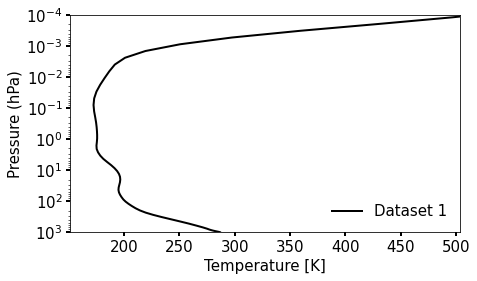

<bound method interactive.update of interactive(children=(Dropdown(description='plot_type', options=('Vertical profile plot', 'Zonal mean plot', 'Plot 2D field', 'Streamline plot', 'Earth projection plot'), value='Vertical profile plot'), Output(layout=Layout(height='2000px'))), _dom_classes=('widget-interact',))>

In [23]:
def final_widget(plot_type):
    #Vertical profile plots
    if (plot_type ==  'Vertical profile plot'):
        VP = interactive(Vertical_Profile_Plot, field=ds1.data_vars.keys(), logtop=(-5,2,0.5), 
                         fig_width = np.arange(1,21), fig_height = np.arange(1,21), plot_num = np.arange(1,number+1),
                         xscale = ['Linear', 'log' , 'Symmetric log'],save = [False, True])
        display(VP)
        
    #Zonal mean plots
    if (plot_type == 'Zonal mean plot'):
        ZM = interactive(Zonal_Mean_Plot, field=ds1.data_vars.keys(), logtop=(-6,2,0.5), cmap=cmaps, 
                         fig_width = np.arange(1,21), fig_height = np.arange(1,21), plot_num = np.arange(1,number+1),
                         Contours = [False, True], Levels = (1,15,1), logc = [False, True], save = [False, True])
        display(ZM)
    
    #Plot many different vertical profiles next to each other
    if (plot_type == 'Plot 2D field'):
        P2D = interactive(Two_D_Plot, plot_num = np.arange(1,number+1), field = ds1.data_vars.keys(), cmap = cmaps, 
                          fig_width = np.arange(1,21), fig_height = np.arange(1,21), Cmap_Levels = [False, True],
                          Contours = [False, True], Levels = (1,15,1), logc = [False, True], save = [False, True])
        display(P2D)
        
    #streamline plots
    if (plot_type == 'Streamline plot'):
        SLP = interactive(Streamline_Plot, plot_num = np.arange(1,number+1), field = ds1.data_vars.keys(), 
                          cmap = cmaps, avg = [False, True],level = np.arange(0,70),
                          average = ['Lower tropospheric', 'Middle tropospheric', 'Upper tropospheric', 'Tropospheric', 'Stratospheric', 'Mesospheric'], 
                          quiver = [True, False], fig_width = np.arange(1,21), fig_height = np.arange(1,21),  
                          Projection = ['Orthographic','Robinson', 'Mollweide', 'Mercator', 'EckertIV'],
                          lon = np.arange(0,360,15), lat  = np.arange(-90,90+15,15),
                          streamline = [False, True], colourbar_streamline = [False, True], coast = [False, True])
        display(SLP)  
        
    #projection of a spherical Earth plot    
    if (plot_type == 'Earth projection plot'):
        EP = interactive(Earth_Plot, field=ds1.data_vars.keys(), plot_num = np.arange(1,number+1), 
                         lon = np.arange(0,360,15), lat  = np.arange(-90,90+15,15), cmap=cmaps,
                         fig_width = np.arange(1,21), fig_height = np.arange(1,21), level = np.arange(0,70), 
                         Projection = ['Orthographic','Robinson', 'Mollweide', 'Mercator', 'EckertIV'], 
                         columns = [False, True], m_var = np.arange(0,60,1), save = [False, True])
        display(EP)

Final_Widget = interactive(final_widget,
                 plot_type = ['Vertical profile plot',
                              'Zonal mean plot',
                              'Plot 2D field',
                              'Streamline plot', 
                              'Earth projection plot'])

output = Final_Widget.children[-1]
output.layout.height = '2000px'
display(Final_Widget)
Final_Widget.update



In [ ]:
'''
only uncomment the following if you want to make all cells invisible
'''

'''
%%html
<style>
div.input {
    display:none;
}
</style>
'''